In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred


In [14]:
fred_key = "46f0250646a5e8c5689172d7542b1375"

In [15]:
fred = Fred(api_key=fred_key)

The API allows to get searches in a data frame format

In [31]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2023-12-13   2023-12-13   
CSUSHPINSA              CSUSHPINSA     2023-12-13   2023-12-13   
SP500                        SP500     2023-12-13   2023-12-13   
MEHOINUSA672N        MEHOINUSA672N     2023-12-13   2023-12-13   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2023-12-13   2023-12-13   
...                            ...            ...          ...   
CSHICPTZA156NRUG  CSHICPTZA156NRUG     2023-12-13   2023-12-13   
CSHCCPTTA156NRUG  CSHCCPTTA156NRUG     2023-12-13   2023-12-13   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2023-12-13   2023-12-13   
CSHXCPNAA156NRUG  CSHXCPNAA156NRUG     2023-12-13   2023-12-13   
DDEM01ECA156NWDB  DDEM01ECA156NWDB     2023-12-13   2023-12-13   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
CSHICPTZA156NRUG  Share of Gross Capital Formation at Current Pu...   
CSHCCPTTA156NRUG  Share of Household Consumption at Current Purc...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHXCPNAA156NRUG  Share of Merchandise Exports at Current Purcha...   
DDEM01ECA156NWDB  Stock Market Turnover Ratio (Value Traded/Capi...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2023-12-12  Daily, Close   
CSUSHPINSA              1987-01-01      2023-09-01       Monthly   
SP500                   2013-12-13      2023-12-12  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2023-12-12  Daily, Close   
...                            ...             ...           ...   
CSHICPTZA156NRUG        1960-01-01      2019-01-01        Annual   
CSHCCPTTA156NRUG        1950-01-01      2019-01-01        Annual   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHXCPNAA156NRUG        1960-01-01      2019-01-01        Annual   
DDEM01ECA156NWDB        1995-01-01      2000-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
CSHICPTZA156NRUG               A                         Percent   
CSHCCPTTA156NRUG               A                         Percent   
CSHXCPVEA156NRUG               A                         Percent   
CSHXCPNAA156NRUG               A                         Percent   
DDEM01ECA156NWDB               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

Once you identify the ID of the series you are interested, use the ``.get_series`` method

<Axes: >

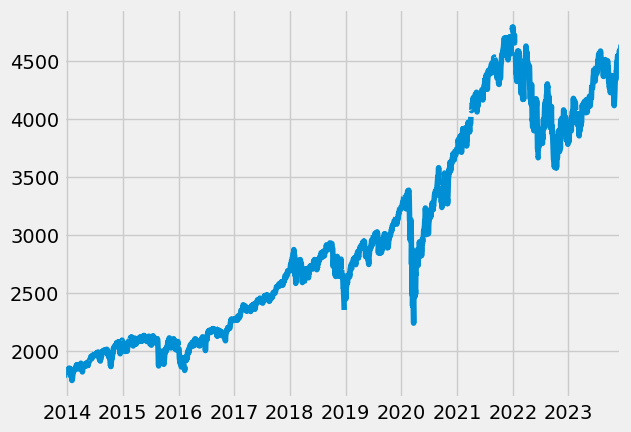

In [33]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot()


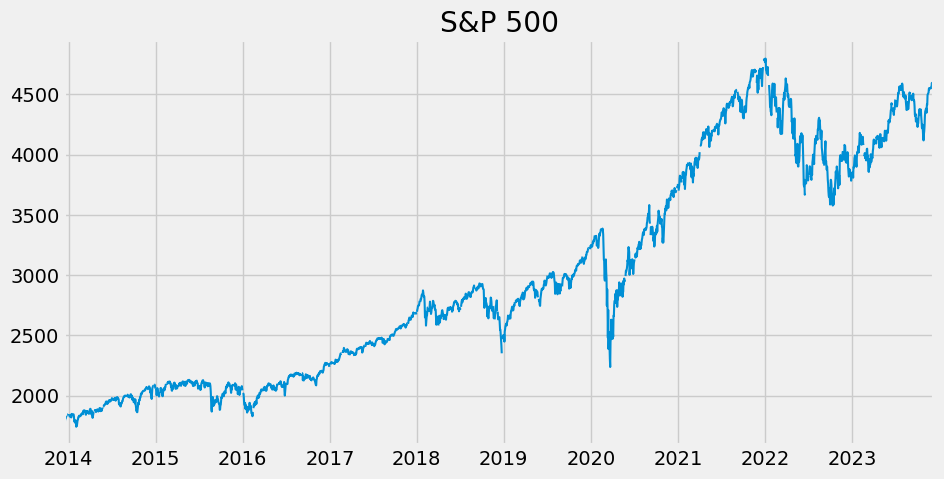

In [36]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=1.5)
plt.show()

You can pull and join multiple series

In [62]:
gdp = fred.search('GDP Mexico')
gdp.head(20)

id realtime_start realtime_end  \
series id                                                        
NGDPRSAXDCMXQ        NGDPRSAXDCMXQ     2023-12-13   2023-12-13   
NGDPRNSAXDCMXQ      NGDPRNSAXDCMXQ     2023-12-13   2023-12-13   
NGDPRXDCMXA            NGDPRXDCMXA     2023-12-13   2023-12-13   
MKTGDPMXA646NWDB  MKTGDPMXA646NWDB     2023-12-13   2023-12-13   
MEXNGDPRPCH            MEXNGDPRPCH     2023-12-13   2023-12-13   
NYGDPPCAPKDMEX      NYGDPPCAPKDMEX     2023-12-13   2023-12-13   
RGDPNAMXA666NRUG  RGDPNAMXA666NRUG     2023-12-13   2023-12-13   
GGGDTAMXA188N        GGGDTAMXA188N     2023-12-13   2023-12-13   
MEXGGXWDGGDP          MEXGGXWDGGDP     2023-12-13   2023-12-13   
MEXGDPNQDSMEI        MEXGDPNQDSMEI     2023-12-13   2023-12-13   
MEXGDPNADSMEI        MEXGDPNADSMEI     2023-12-13   2023-12-13   
DDOI11MXA156NWDB  DDOI11MXA156NWDB     2023-12-13   2023-12-13   
NGDPSAXDCMXQ          NGDPSAXDCMXQ     2023-12-13   2023-12-13   
NGDPNSAXDCMXQ        NGDPNSAXDCMXQ     2023-12-13   2023-12-13   
NGDPXDCMXA              NGDPXDCMXA     2023-12-13   2023-12-13   
MEXBCAGDPBP6          MEXBCAGDPBP6     2023-12-13   2023-12-13   
NAEXKP01MXQ189S    NAEXKP01MXQ189S     2023-12-13   2023-12-13   
NAEXKP01MXA189S    NAEXKP01MXA189S     2023-12-13   2023-12-13   
LABSHPMXA156NRUG  LABSHPMXA156NRUG     2023-12-13   2023-12-13   
NAEXKP01MXQ661S    NAEXKP01MXQ661S     2023-12-13   2023-12-13   

                                                              title  \
series id                                                             
NGDPRSAXDCMXQ                Real Gross Domestic Product for Mexico   
NGDPRNSAXDCMXQ               Real Gross Domestic Product for Mexico   
NGDPRXDCMXA                  Real Gross Domestic Product for Mexico   
MKTGDPMXA646NWDB                  Gross Domestic Product for Mexico   
MEXNGDPRPCH                       Gross Domestic Product for Mexico   
NYGDPPCAPKDMEX                   Constant GDP per capita for Mexico   
RGDPNAMXA666NRUG    Real GDP at Constant National Prices for Mexico   
GGGDTAMXA188N              General government gross debt for Mexico   
MEXGGXWDGGDP               General Government Gross Debt for Mexico   
MEXGDPNQDSMEI     National Accounts: GDP by Expenditure: Current...   
MEXGDPNADSMEI     National Accounts: GDP by Expenditure: Current...   
DDOI11MXA156NWDB               Remittance Inflows to GDP for Mexico   
NGDPSAXDCMXQ              Nominal Gross Domestic Product for Mexico   
NGDPNSAXDCMXQ             Nominal Gross Domestic Product for Mexico   
NGDPXDCMXA                Nominal Gross Domestic Product for Mexico   
MEXBCAGDPBP6                         Balance of Payments for Mexico   
NAEXKP01MXQ189S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01MXA189S   National Accounts: GDP by Expenditure: Constan...   
LABSHPMXA156NRUG  Share of Labour Compensation in GDP at Current...   
NAEXKP01MXQ661S   National Accounts: GDP by Expenditure: Constan...   

                 observation_start observation_end  frequency frequency_short  \
series id                                                                       
NGDPRSAXDCMXQ           1993-01-01      2023-04-01  Quarterly               Q   
NGDPRNSAXDCMXQ          1993-01-01      2023-01-01  Quarterly               Q   
NGDPRXDCMXA             1993-01-01      2022-01-01     Annual               A   
MKTGDPMXA646NWDB        1960-01-01      2022-01-01     Annual               A   
MEXNGDPRPCH             1980-01-01      2028-01-01     Annual               A   
NYGDPPCAPKDMEX          1960-01-01      2022-01-01     Annual               A   
RGDPNAMXA666NRUG        1950-01-01      2019-01-01     Annual               A   
GGGDTAMXA188N           1996-01-01      2022-01-01     Annual               A   
MEXGGXWDGGDP            1996-01-01      2028-01-01     Annual               A   
MEXGDPNQDSMEI           1993-01-01      2023-01-01  Quarterly               Q   
MEXGDPNADSMEI           1993-01-01      2022

In [64]:
mexico_gdp = fred.get_series('MEXNGDPRPCH')
#Get the info from 2000 to 2023:
mexico_gdp = mexico_gdp['2000':'2023']
mexico_gdp

2000-01-01    5.029
2001-01-01   -0.451
2002-01-01   -0.237
2003-01-01    1.186
2004-01-01    3.565
2005-01-01    2.113
2006-01-01    4.805
2007-01-01    2.078
2008-01-01    0.943
2009-01-01   -6.295
2010-01-01    4.971
2011-01-01    3.444
2012-01-01    3.553
2013-01-01    0.852
2014-01-01    2.504
2015-01-01    2.702
2016-01-01    1.772
2017-01-01    1.872
2018-01-01    1.972
2019-01-01   -0.278
2020-01-01   -8.652
2021-01-01    5.838
2022-01-01    3.898
2023-01-01    3.177
dtype: float64

<Axes: title={'center': 'Mexico GDP'}>

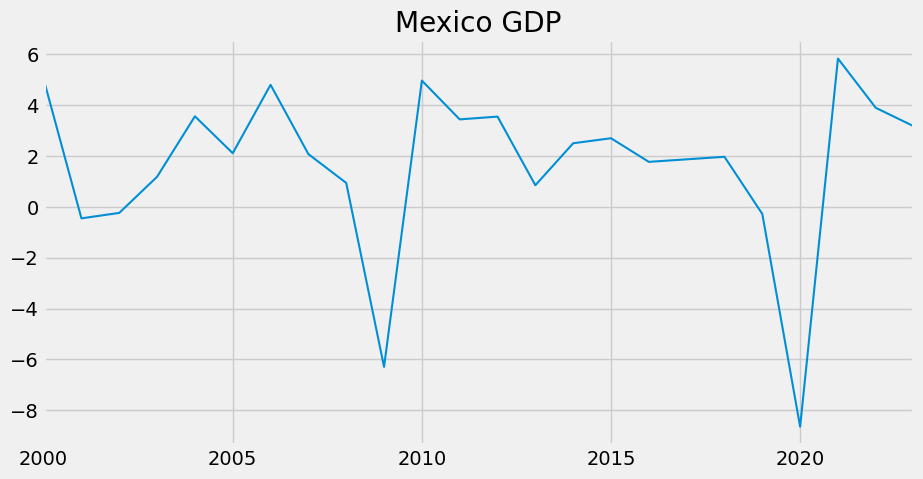

In [65]:
mexico_gdp.plot(figsize=(10, 5), title='Mexico GDP', lw=1.5)


In [67]:
usa_gdp_search = fred.search('Real Gross Domestic Product for United States')
usa_gdp_search.head(20)

id realtime_start realtime_end  \
series id                                                      
GDPC1                      GDPC1     2023-12-13   2023-12-13   
A191RL1Q225SBEA  A191RL1Q225SBEA     2023-12-13   2023-12-13   
GDPCA                      GDPCA     2023-12-13   2023-12-13   
A191RO1Q156NBEA  A191RO1Q156NBEA     2023-12-13   2023-12-13   
ND000334Q              ND000334Q     2023-12-13   2023-12-13   
A191RL1A225NBEA  A191RL1A225NBEA     2023-12-13   2023-12-13   
OB000334Q              OB000334Q     2023-12-13   2023-12-13   
NB000334Q              NB000334Q     2023-12-13   2023-12-13   
A939RX0Q048SBEA  A939RX0Q048SBEA     2023-12-13   2023-12-13   
PCECC96                  PCECC96     2023-12-13   2023-12-13   
DPCERL1Q225SBEA  DPCERL1Q225SBEA     2023-12-13   2023-12-13   
PCECCA                    PCECCA     2023-12-13   2023-12-13   
A067RO1Q156NBEA  A067RO1Q156NBEA     2023-12-13   2023-12-13   
ND000349Q              ND000349Q     2023-12-13   2023-12-13   
DPCERO1Q156NBEA  DPCERO1Q156NBEA     2023-12-13   2023-12-13   
DPCERL1A225NBEA  DPCERL1A225NBEA     2023-12-13   2023-12-13   
DPIC96                    DPIC96     2023-12-13   2023-12-13   
NB000349Q              NB000349Q     2023-12-13   2023-12-13   
A067RL1Q156SBEA  A067RL1Q156SBEA     2023-12-13   2023-12-13   
OB000349Q              OB000349Q     2023-12-13   2023-12-13   

                                                  title observation_start  \
series id                                                                   
GDPC1                       Real Gross Domestic Product        1947-01-01   
A191RL1Q225SBEA             Real Gross Domestic Product        1947-04-01   
GDPCA                       Real Gross Domestic Product        1929-01-01   
A191RO1Q156NBEA             Real Gross Domestic Product        1948-01-01   
ND000334Q                   Real Gross Domestic Product        2002-01-01   
A191RL1A225NBEA             Real Gross Domestic Product        1930-01-01   
OB000334Q                   Real Gross Domestic Product        2003-01-01   
NB000334Q                   Real Gross Domestic Product        2002-01-01   
A939RX0Q048SBEA  Real gross domestic product per capita        1947-01-01   
PCECC96          Real Personal Consumption Expenditures        1947-01-01   
DPCERL1Q225SBEA  Real Personal Consumption Expenditures        1947-04-01   
PCECCA           Real Personal Consumption Expenditures        1929-01-01   
A067RO1Q156NBEA         Real Disposable Personal Income        1948-01-01   
ND000349Q        Real Personal Consumption Expenditures        2002-01-01   
DPCERO1Q156NBEA  Real Personal Consumption Expenditures        1948-01-01   
DPCERL1A225NBEA  Real Personal Consumption Expenditures        1930-01-01   
DPIC96                  Real Disposable Personal Income        1947-01-01   
NB000349Q        Real Personal Consumption Expenditures        2002-01-01   
A067RL1Q156SBEA         Real Disposable Personal Income        1947-04-01   
OB000349Q        Real Personal Consumption Expenditures        2003-01-01   

                observation_end  frequency frequency_short  \
series id                                                    
GDPC1                2023-07-01  Quarterly               Q   
A191RL1Q225SBEA      2023-07-01  Quarterly               Q   
GDPCA                2022-01-01     Annual               A   
A191RO1Q156NBEA      2023-07-01  Quarterly               Q   
ND000334Q            2023-07-01  Quarterly               Q   
A191RL1A225NBEA      2022-01-01     Annual               A   
OB000334Q            2023-07-01  Quarterly               Q   
NB000334Q            2023-07-01  Quarterly               Q   
A939RX0Q048SBEA      2023-07-01  Quarterly               Q   
PCECC96              2023-07-01  Quarterly               Q   
DPCERL1Q225SBEA      2023-07-01  Quarterly               Q   
PCECCA               2022-01-01     Annual               A   
A067RO1Q156NBEA      2023-07-01  Quarterly               Q

2000-01-01    4.1
2001-01-01    1.0
2002-01-01    1.7
2003-01-01    2.8
2004-01-01    3.8
2005-01-01    3.5
2006-01-01    2.8
2007-01-01    2.0
2008-01-01    0.1
2009-01-01   -2.6
2010-01-01    2.7
2011-01-01    1.6
2012-01-01    2.3
2013-01-01    2.1
2014-01-01    2.5
2015-01-01    2.9
2016-01-01    1.8
2017-01-01    2.5
2018-01-01    3.0
2019-01-01    2.5
2020-01-01   -2.2
2021-01-01    5.8
2022-01-01    1.9
dtype: float64


<Axes: title={'center': 'USA GDP Grow'}>

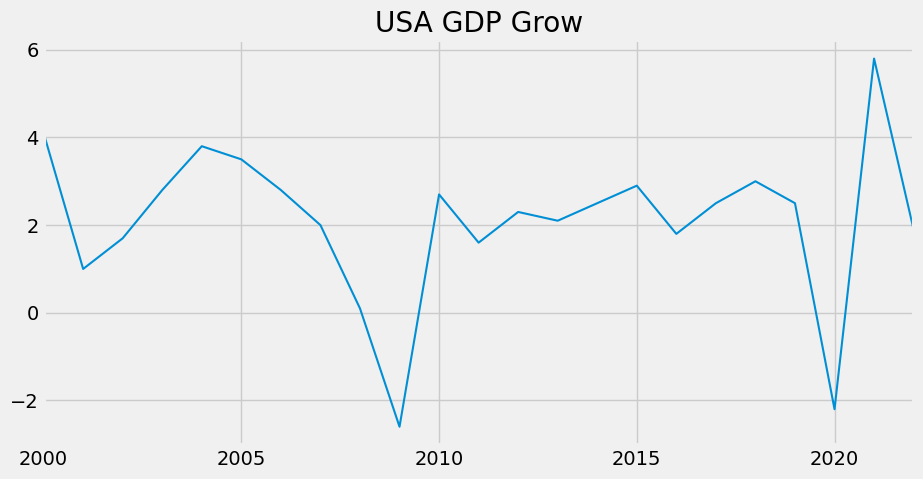

In [68]:
usa_gdp = fred.get_series('A191RL1A225NBEA')
usa_gdp = usa_gdp['2000':'2023']
print(usa_gdp)
usa_gdp.plot(figsize=(10, 5), title='USA GDP Grow', lw=1.5)

In [69]:
china_gdp_search = fred.search('Real Gross Domestic Product for China')

In [73]:
china_gdp_search.head(20)


id realtime_start realtime_end  \
series id                                                        
NGDPRXDCCNA            NGDPRXDCCNA     2023-12-13   2023-12-13   
NYGDPPCAPKDCHN      NYGDPPCAPKDCHN     2023-12-13   2023-12-13   
RGDPNACNA666NRUG  RGDPNACNA666NRUG     2023-12-13   2023-12-13   
RGDPNATWA666NRUG  RGDPNATWA666NRUG     2023-12-13   2023-12-13   
NAEXKP01CNA657S    NAEXKP01CNA657S     2023-12-13   2023-12-13   
NAEXKP01CNA652S    NAEXKP01CNA652S     2023-12-13   2023-12-13   
CHNGDPRAPSMEI        CHNGDPRAPSMEI     2023-12-13   2023-12-13   
NAEXKP01CNA661S    NAEXKP01CNA661S     2023-12-13   2023-12-13   
DDDI06CNA156NWDB  DDDI06CNA156NWDB     2023-12-13   2023-12-13   
PPPTTLCNA618NUPN  PPPTTLCNA618NUPN     2023-12-13   2023-12-13   
PPPTT2CNA618NUPN  PPPTT2CNA618NUPN     2023-12-13   2023-12-13   
CHNNGDPRPCPPPT      CHNNGDPRPCPPPT     2023-12-13   2023-12-13   
KCPPPGCNA156NUPN  KCPPPGCNA156NUPN     2023-12-13   2023-12-13   
PPPTTLTWA618NUPN  PPPTTLTWA618NUPN     2023-12-13   2023-12-13   
KCPPP2CNA156NUPN  KCPPP2CNA156NUPN     2023-12-13   2023-12-13   
TWNNGDPRPCPPPT      TWNNGDPRPCPPPT     2023-12-13   2023-12-13   
NYGDPPCAPKDHKG      NYGDPPCAPKDHKG     2023-12-13   2023-12-13   
KIPPP2CNA156NUPN  KIPPP2CNA156NUPN     2023-12-13   2023-12-13   
DDDI02CNA156NWDB  DDDI02CNA156NWDB     2023-12-13   2023-12-13   
KIPPPGCNA156NUPN  KIPPPGCNA156NUPN     2023-12-13   2023-12-13   

                                                              title  \
series id                                                             
NGDPRXDCCNA                   Real Gross Domestic Product for China   
NYGDPPCAPKDCHN                    Constant GDP per capita for China   
RGDPNACNA666NRUG     Real GDP at Constant National Prices for China   
RGDPNATWA666NRUG  Real GDP at Constant National Prices for Taiwa...   
NAEXKP01CNA657S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01CNA652S   National Accounts: GDP by Expenditure: Constan...   
CHNGDPRAPSMEI     National Accounts: GDP by Expenditure: Constan...   
NAEXKP01CNA661S   National Accounts: GDP by Expenditure: Constan...   
DDDI06CNA156NWDB               Central Bank Assets to GDP for China   
PPPTTLCNA618NUPN         Purchasing Power Parity over GDP for China   
PPPTT2CNA618NUPN         Purchasing Power Parity over GDP for China   
CHNNGDPRPCPPPT    National Accounts: Real Gross Domestic Product...   
KCPPPGCNA156NUPN  Consumption Share of Purchasing Power Parity C...   
PPPTTLTWA618NUPN        Purchasing Power Parity over GDP for Taiwan   
KCPPP2CNA156NUPN  Consumption Share of Purchasing Power Parity C...   
TWNNGDPRPCPPPT    National Accounts: Real Gross Domestic Product...   
NYGDPPCAPKDHKG     Constant GDP per capita for Hong Kong SAR, China   
KIPPP2CNA156NUPN  Investment Share of Purchasing Power Parity Co...   
DDDI02CNA156NWDB         Deposit Money Bank Assets to GDP for China   
KIPPPGCNA156NUPN  Investment Share of Purchasing Power Parity Co...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
NGDPRXDCCNA             2011-01-01      2022-01-01    Annual               A   
NYGDPPCAPKDCHN          1960-01-01      2022-01-01    Annual               A   
RGDPNACNA666NRUG        1952-01-01      2019-01-01    Annual               A   
RGDPNATWA666NRUG        1951-01-01      2019-01-01    Annual               A   
NAEXKP01CNA657S         1971-01-01      2019-01-01    Annual               A   
NAEXKP01CNA652S         1970-01-01      2020-01-01    Annual               A   
CHNGDPRAPSMEI           1971-01-01      2019-01-01    Annual               A   
NAEXKP01CNA661S         1970-01-01      2020-01-01    Annual               A   
DDDI06CNA156NWDB        1986-01-01      2020-01-01    Annual               A   
PPPTTLCNA618NUPN        1952-01-01      2010-01-01    Annual               A   
PPPTT2CNA618NUPN        1952-01-01      2010-01-01    An

2000-01-01          NaN
2001-01-01    10.572597
2002-01-01     9.792194
2003-01-01    12.901436
2004-01-01    17.772068
2005-01-01    16.908225
2006-01-01    20.392179
2007-01-01    29.003439
2008-01-01    29.405997
2009-01-01    11.043037
2010-01-01    19.317137
2011-01-01    24.056308
2012-01-01    12.985955
2013-01-01    12.169039
2014-01-01     9.457782
2015-01-01     5.593446
2016-01-01     1.552589
2017-01-01     9.589131
2018-01-01    12.870456
2019-01-01     2.771238
dtype: float64


<Axes: title={'center': 'China GDP'}>

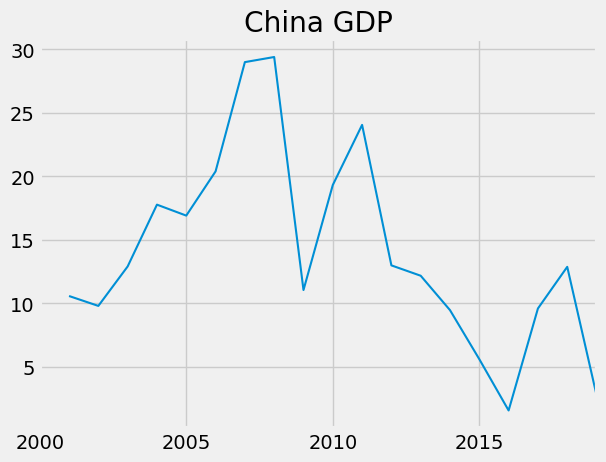

In [83]:
china_rgdp = fred.get_series('MKTGDPCNA646NWDB')
china_rgdp = china_gdp['2000':'2019']
china_gdp = china_rgdp.pct_change() * 100
print(china_gdp)

china_gdp.plot( title='China GDP', lw=1.5)


In [93]:
mx = mexico_gdp.to_frame(name='MX')
usa = usa_gdp.to_frame(name='USA')
china = china_gdp.to_frame(name='China').dropna()

In [100]:
india_search = fred.search('Real Gross Domestic Product for India')
india_search.head(20)

id realtime_start realtime_end  \
series id                                                        
NAEXKP01INQ652S    NAEXKP01INQ652S     2023-12-13   2023-12-13   
NAEXKP01INQ657S    NAEXKP01INQ657S     2023-12-13   2023-12-13   
INDGDPRQPSMEI        INDGDPRQPSMEI     2023-12-13   2023-12-13   
NGDPRNSAXDCINQ      NGDPRNSAXDCINQ     2023-12-13   2023-12-13   
NAEXKP01INQ661S    NAEXKP01INQ661S     2023-12-13   2023-12-13   
NAEXKP01INA652S    NAEXKP01INA652S     2023-12-13   2023-12-13   
NAEXKP01INA657S    NAEXKP01INA657S     2023-12-13   2023-12-13   
NAEXKP01INA661S    NAEXKP01INA661S     2023-12-13   2023-12-13   
INDGDPRAPSMEI        INDGDPRAPSMEI     2023-12-13   2023-12-13   
NGDPRXDCINA            NGDPRXDCINA     2023-12-13   2023-12-13   
RGDPNAINA666NRUG  RGDPNAINA666NRUG     2023-12-13   2023-12-13   
NYGDPPCAPKDIND      NYGDPPCAPKDIND     2023-12-13   2023-12-13   
NAEXKP04INQ652S    NAEXKP04INQ652S     2023-12-13   2023-12-13   
NAEXKP03INQ652S    NAEXKP03INQ652S     2023-12-13   2023-12-13   
NAEXKP04INQ657S    NAEXKP04INQ657S     2023-12-13   2023-12-13   
NAEXKP03INQ657S    NAEXKP03INQ657S     2023-12-13   2023-12-13   
NAEXKP03INQ659S    NAEXKP03INQ659S     2023-12-13   2023-12-13   
NAEXKP04INQ661S    NAEXKP04INQ661S     2023-12-13   2023-12-13   
NAEXKP04INA652S    NAEXKP04INA652S     2023-12-13   2023-12-13   
NAEXKP04INQ659S    NAEXKP04INQ659S     2023-12-13   2023-12-13   

                                                              title  \
series id                                                             
NAEXKP01INQ652S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01INQ657S   National Accounts: GDP by Expenditure: Constan...   
INDGDPRQPSMEI     National Accounts: GDP by Expenditure: Constan...   
NGDPRNSAXDCINQ                Real Gross Domestic Product for India   
NAEXKP01INQ661S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01INA652S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01INA657S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP01INA661S   National Accounts: GDP by Expenditure: Constan...   
INDGDPRAPSMEI     National Accounts: GDP by Expenditure: Constan...   
NGDPRXDCINA                   Real Gross Domestic Product for India   
RGDPNAINA666NRUG     Real GDP at Constant National Prices for India   
NYGDPPCAPKDIND                    Constant GDP per capita for India   
NAEXKP04INQ652S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP03INQ652S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP04INQ657S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP03INQ657S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP03INQ659S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP04INQ661S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP04INA652S   National Accounts: GDP by Expenditure: Constan...   
NAEXKP04INQ659S   National Accounts: GDP by Expenditure: Constan...   

                 observation_start observation_end  frequency frequency_short  \
series id                                                                       
NAEXKP01INQ652S         1996-04-01      2023-07-01  Quarterly               Q   
NAEXKP01INQ657S         2011-07-01      2023-07-01  Quarterly               Q   
INDGDPRQPSMEI           2012-04-01      2023-07-01  Quarterly               Q   
NGDPRNSAXDCINQ          2004-04-01      2023-07-01  Quarterly               Q   
NAEXKP01INQ661S         2011-04-01      2023-07-01  Quarterly               Q   
NAEXKP01INA652S         1997-01-01      2022-01-01     Annual               A   
NAEXKP01INA657S         2013-01-01      2022-01-01     Annual               A   
NAEXKP01INA661S         2012-01-01      2022-01-01     Annual               A   
INDGDPRAPSMEI           2013-01-01      2022-01-01     Annual               A   
NGDPRXDCINA             2005-01-01      2022-01-01     Annual               A   
RGDPNAINA666NRUG        1950-01-01      2019

In [107]:
india_gdp = fred.get_series('NAEXKP01INA652S')
india_gdp = india_gdp['2000':'2022']
india_gdp = india_gdp.pct_change() * 100
india = india_gdp.to_frame(name='India').dropna()

<Axes: title={'center': 'GDP Growth'}>

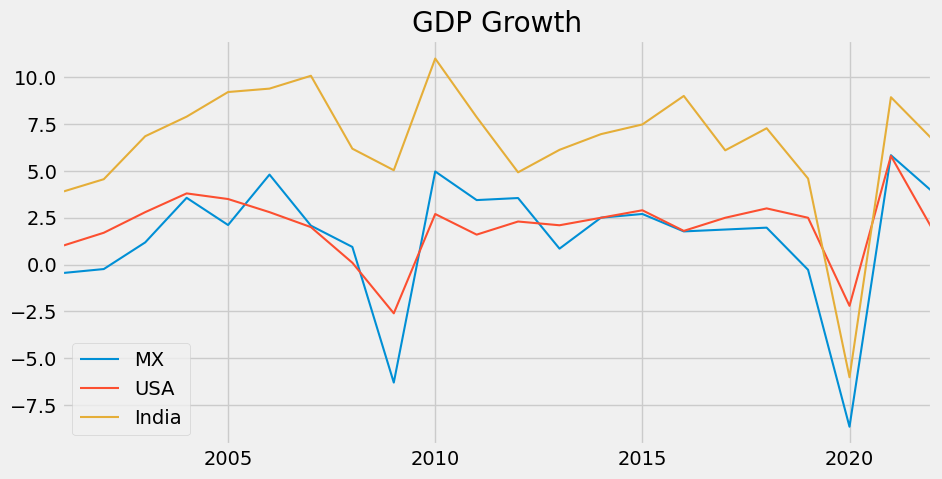

In [109]:
df = pd.concat([mx, usa,india], axis=1)
df.dropna(inplace=True)
df.plot(figsize=(10, 5), title='GDP Growth', lw=1.5)

In [110]:

unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [111]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [114]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [115]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [118]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 10, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 4.6, 4.7, 4.8]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 10, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  3.9,  4. ,  4.2]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 10, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4.1, 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 8, 1, 0, 0),
                          datetime.datetime(2023, 9, 1, 0, 0),
                          datetime.datetime(2023, 10, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 2.7, 2.8, 2.8]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Ohio<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Ohio',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Ohio',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.dat

In [120]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [121]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

KeyError: 'the District of Columbia'

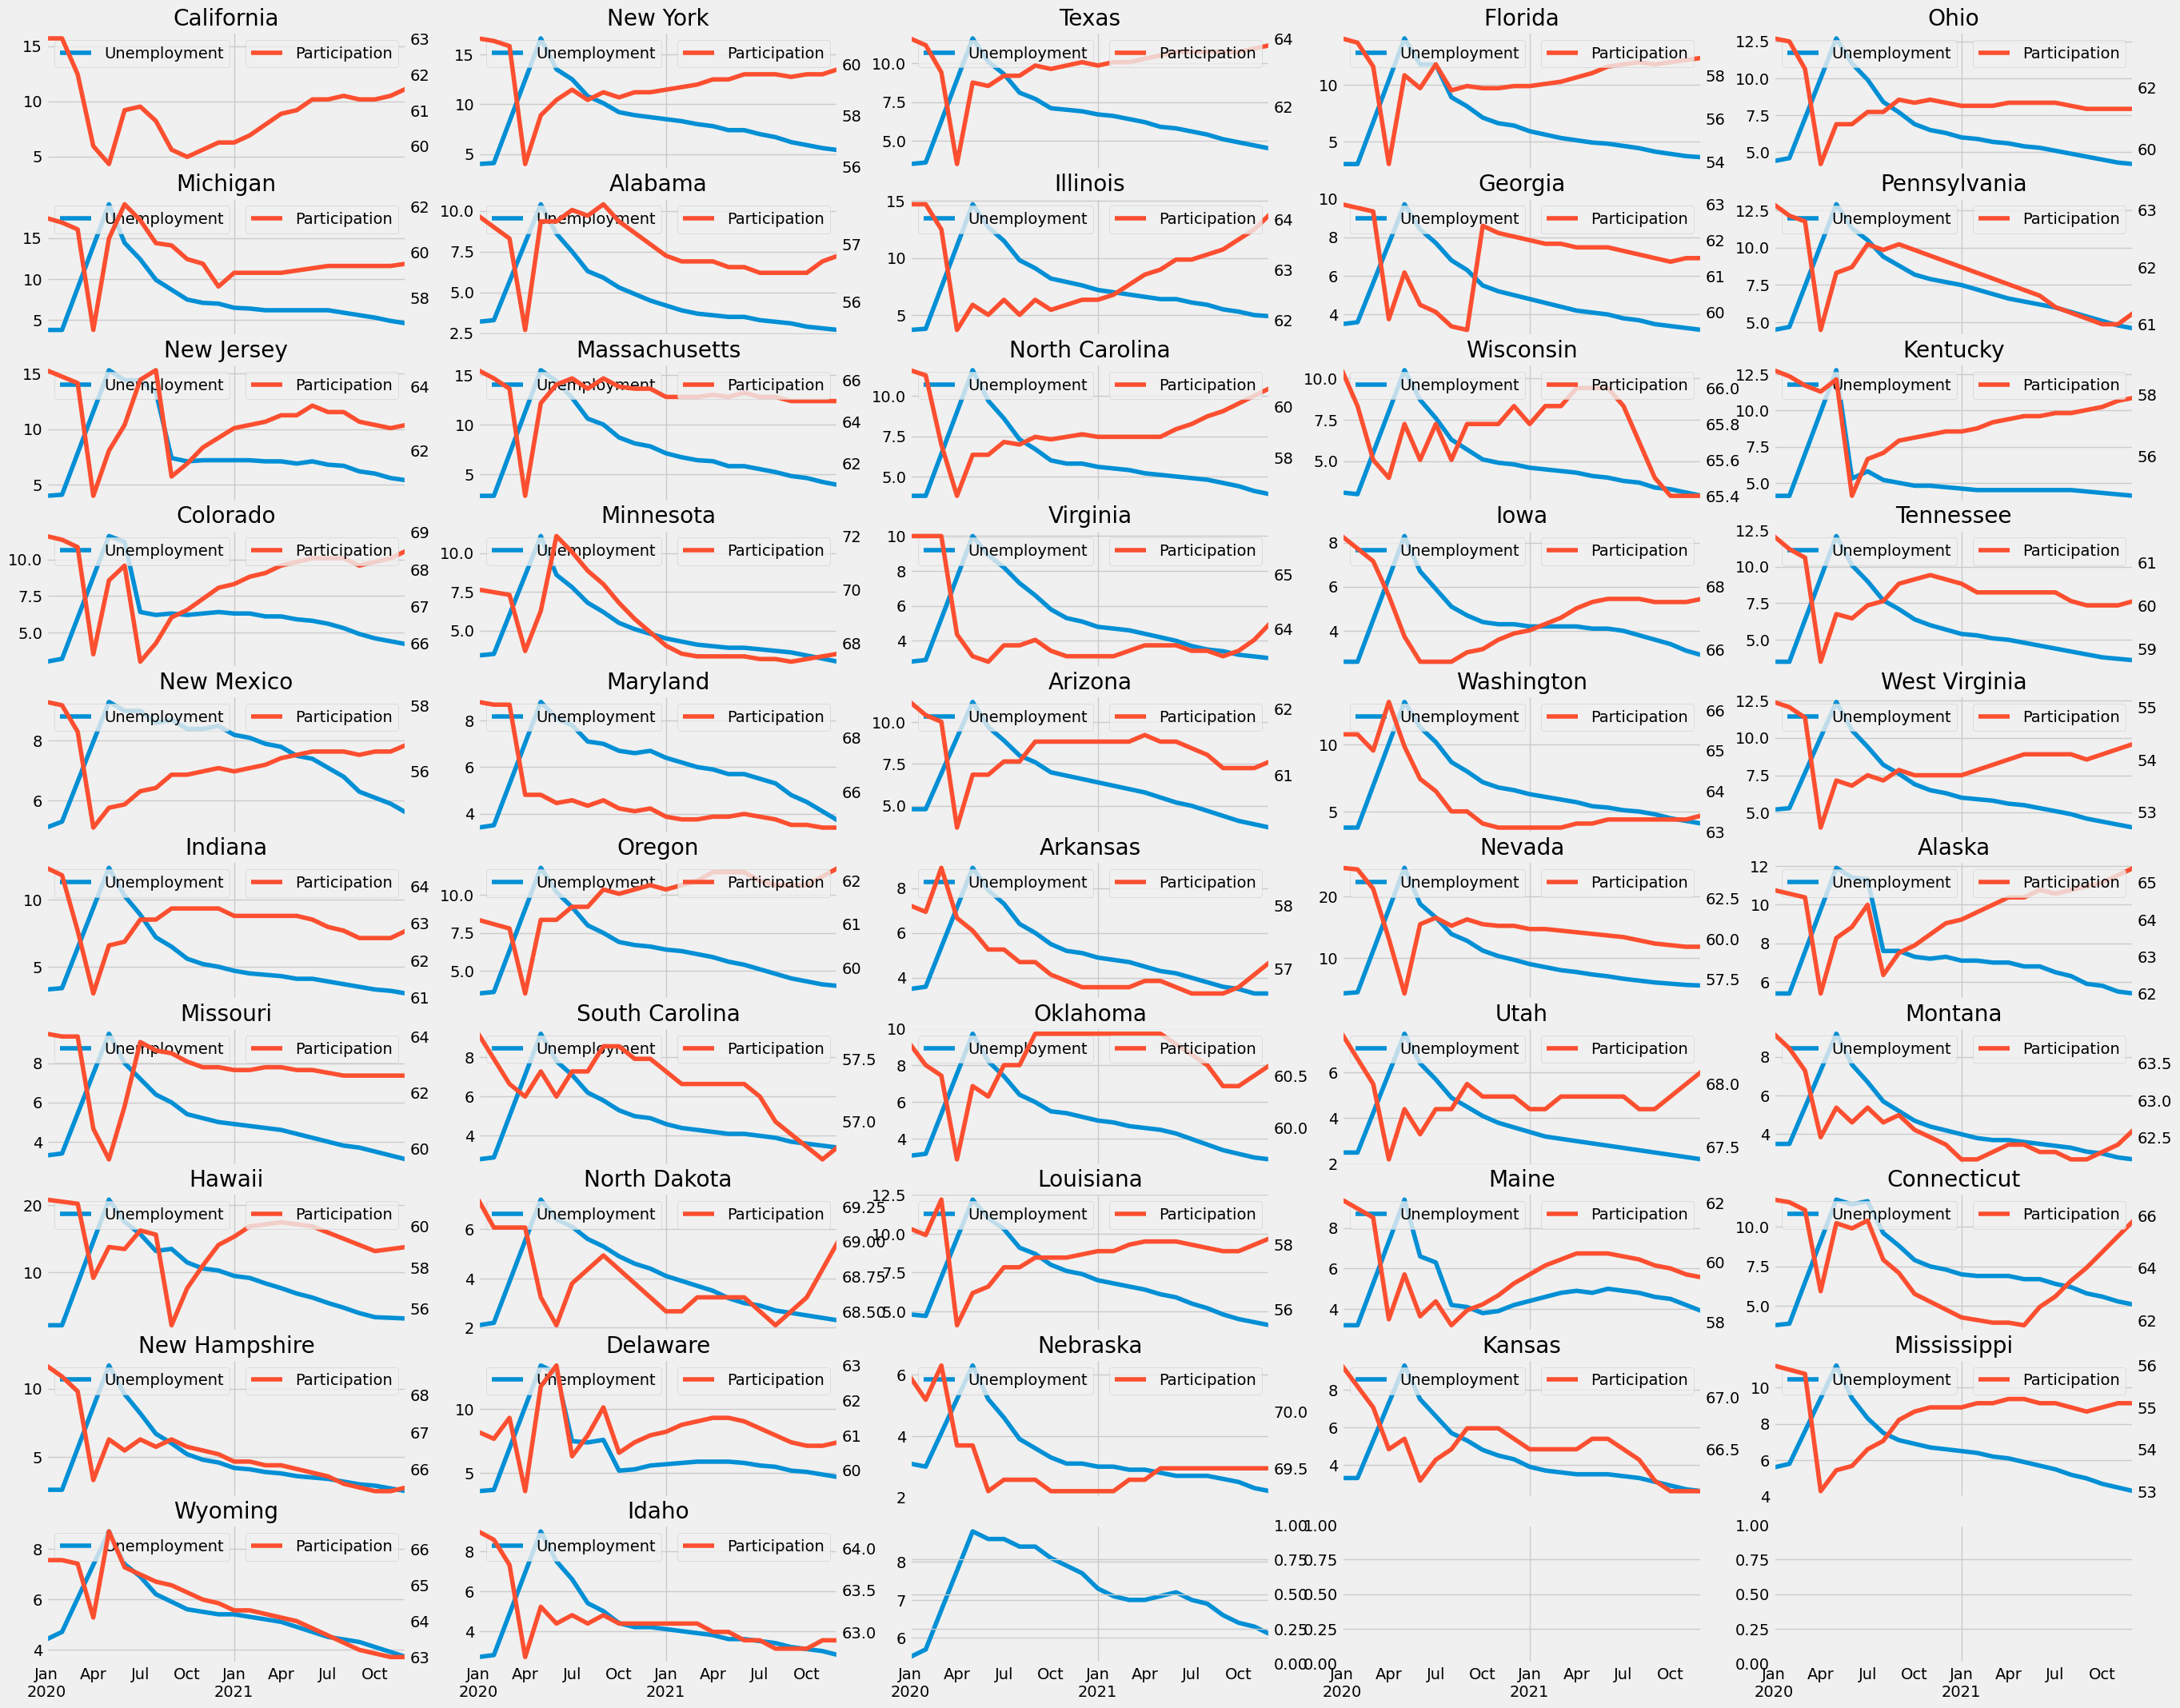

In [125]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia", "Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()

    # Trama de desempleo con etiqueta
    uemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment', color=color_pal[0])

    # Trama de participación con etiqueta
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])

    ax2.grid(False)
    axs[i].set_title(state)
    
    # Mostrar leyendas para ambas series en el mismo gráfico
    i += 1
plt.tight_layout()
plt.title('Unemployment and Participation Rates by State')
plt.show()